<a href="https://colab.research.google.com/github/sAI-2025/Email-Marketing-Campaign-Optimization/blob/main/Email_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 🎯 **Main Goal for the Data Scientist**

> 👉 **To analyze and optimize the performance of email marketing campaigns by understanding user behavior — specifically, who opens emails, clicks links, and what user features drive those actions.**




### 🧠 **Business Case & Problem Statement**

> **"Our marketing team sends out promotional emails to users. But only a small percentage open them, and even fewer click the links. We want to understand what drives these actions and how to improve engagement."**

So, the problem becomes:
- Why are some users opening or clicking emails while others are not?
- Can we predict who will click next time?
- Can we personalize campaigns better?



### 🏢 **Business Model Behind This**

This aligns with a **SaaS / E-Commerce / Digital Product business model** that relies heavily on:
- 🧾 **Email Campaigns** for marketing
- 💵 **Customer Purchases** from links in emails
- 📈 **User Retention and Growth** via engagement

> Optimizing email strategy directly affects **revenue**, **ROI**, and **customer lifetime value (CLV)**.






## **Import Libraries and Load Data**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Set plotting style for nice visuals
sns.set(style="whitegrid")

In [2]:
# 📂 Load the CSVs
email_opened_table = pd.read_csv('/content/drive/MyDrive/Assigments/ML Intern Case Study/email (1)/email_opened_table.csv')
email_table = pd.read_csv('/content/drive/MyDrive/Assigments/ML Intern Case Study/email (1)/email_table.csv')
link_clicked_table = pd.read_csv('/content/drive/MyDrive/Assigments/ML Intern Case Study/email (1)/link_clicked_table.csv')

### 🔹 **Calculate Open Rate and Click Rate**

### 📬 Description
> We calculate the **email open rate** and **click rate** using:
>
> - `open_rate = opened_emails / total_emails * 100`
> - `click_rate = clicked_emails / total_emails * 100`
>
> These metrics help assess how effective the campaign is.


In [3]:
total_emails = len(email_table)
opened_emails = len(email_opened_table)
clicked_emails = len(link_clicked_table)

open_rate = opened_emails / total_emails * 100
click_rate = clicked_emails / total_emails * 100

print(f"📬 Open Rate: {open_rate:.2f}%")
print(f"🖱️ Click Rate: {click_rate:.2f}%")

📬 Open Rate: 10.35%
🖱️ Click Rate: 2.12%


In [4]:
(total_emails,opened_emails,clicked_emails)

(100000, 10345, 2119)

In [5]:
email_table.head(4)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1


In [6]:
link_clicked_table.head(4)

,email_id
0,609056
1,870980
2,935124
3,158501


In [7]:
link_clicked_table.describe()

,email_id
count,2119.000000
mean,496335.084474
std,292863.020634
min,257.000000
25%,238548.500000
50%,488927.000000
75%,757207.000000
max,999920.000000


In [8]:
email_opened_table.describe()

,email_id
count,10345.000000
mean,499067.179604
std,289531.750750
min,49.000000
25%,247395.000000
50%,499261.000000
75%,752779.000000
max,999920.000000


In [9]:
email_table.describe()

,email_id,hour,user_past_purchases
count,100000.000000,100000.000000,100000.00000
mean,498690.196160,9.059300,3.87845
std,289230.727534,4.439637,3.19611
min,8.000000,1.000000,0.00000
25%,246708.250000,6.000000,1.00000
50%,498447.000000,9.000000,3.00000
75%,749942.750000,12.000000,6.00000
max,999998.000000,24.000000,22.00000


### 🔹 **Merge Tables into One Master Dataset**

### 🔗 Description
> We merge the three tables into one dataframe `df`, and add two new binary columns:
>
> - `email_opened`: 1 if email was opened
> - `link_clicked`: 1 if link was clicked

In [10]:
df = email_table.copy()

df['email_opened'] = df['email_id'].isin(email_opened_table['email_id']).astype(int)
df['link_clicked'] = df['email_id'].isin(link_clicked_table['email_id']).astype(int)

df.to_csv("merged_email_data.csv", index=False)

## **EDA**

### 🔹 **1. Clean Data and Initial Exploration**

#### 🧼 Description
> We check for null values, duplicates, and general structure of the dataset.

In [11]:
print("🔢 Total Data Points:", len(df))
print("🧼 Null Values:\n", df.isnull().sum())

# Remove nulls
df.dropna(inplace=True)

# Duplicates check
duplicate_count = df.duplicated(subset=['email_id']).sum()
print("♻️ Duplicate Email IDs:", duplicate_count)

🔢 Total Data Points: 100000
🧼 Null Values:
 email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
email_opened           0
link_clicked           0
dtype: int64
♻️ Duplicate Email IDs: 0


In [12]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [13]:
df.describe()

,email_id,hour,user_past_purchases,email_opened,link_clicked
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,498690.196160,9.059300,3.87845,0.103450,0.021190
std,289230.727534,4.439637,3.19611,0.304547,0.144018
min,8.000000,1.000000,0.00000,0.000000,0.000000
25%,246708.250000,6.000000,1.00000,0.000000,0.000000
50%,498447.000000,9.000000,3.00000,0.000000,0.000000
75%,749942.750000,12.000000,6.00000,0.000000,0.000000
max,999998.000000,24.000000,22.00000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   email_opened         100000 non-null  int64 
 8   link_clicked         100000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


### 🔹 **2. Showing  count some categorical values on each feature**

In [15]:
import matplotlib.pyplot as plt

# List of categorical features
categorical_columns = ['email_text', 'email_version', 'hour', 'weekday',
                       'user_country', 'user_past_purchases', 'email_opened', 'link_clicked']

# Loop through each categorical feature
for column in categorical_columns:
    # Print the value counts for each column

    # # Plot the value counts
    # plt.figure(figsize=(8, 4))  # Set the size of the plot
    # df[column].value_counts().plot(kind='bar', color='skyblue')  # Create a bar plot
    # plt.title(f"Value Counts for {column}")  # Set the title of the plot
    # plt.xlabel(column)  # Label the x-axis
    # plt.ylabel("Count")  # Label the y-axis
    # plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    # plt.tight_layout()  # Adjust layout to prevent label cutoffs
    # plt.show()  # Show the plot
    print(f"Value counts for each feature ``{column}:``")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")


Value counts for each feature ``email_text:``
email_text
long_email     50276
short_email    49724
Name: count, dtype: int64

--------------------------------------------------

Value counts for each feature ``email_version:``
email_version
generic         50209
personalized    49791
Name: count, dtype: int64

--------------------------------------------------

Value counts for each feature ``hour:``
hour
9     8529
8     8398
7     8204
10    8180
11    7483
6     7465
5     6551
12    6508
4     5622
13    5581
3     4610
14    4580
2     3676
15    3493
16    2759
1     2703
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: count, dtype: int64

--------------------------------------------------

Value counts for each feature ``weekday:``
weekday
Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: count, dtype: int64

-------------------------------------

### 🔹 **Plot 3: Frequency emails are Clicked or not**

### 📧 Description
> ### Frequeny   of Short email  clicked
> ### Frequency of long emials clicked


<ipython-input-16-965db13dd055>:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-965db13dd055>:25: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-965db13dd055>:25: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


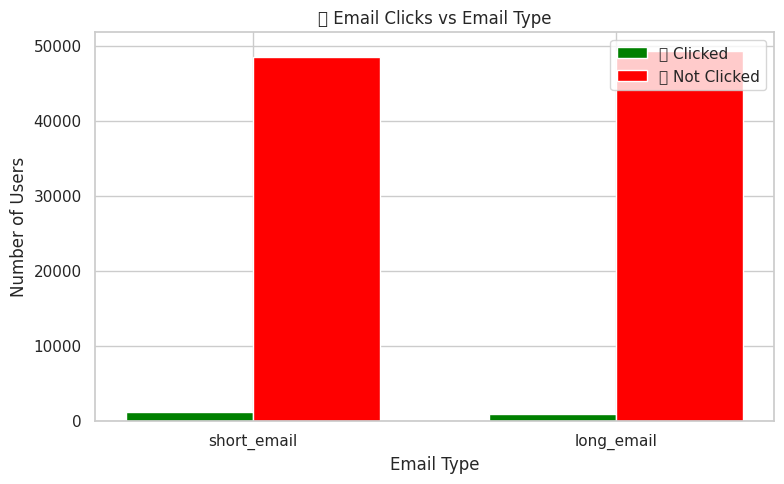

✅ Average Click Rate for Short Emails: 2.39%
✅ Average Click Rate for Long Emails: 1.85%


In [ ]:
# 🔹 Step 2: Count of clicked and not-clicked users per email type
clicked_counts = df[df['link_clicked'] == 1]['email_text'].value_counts()
not_clicked_counts = df[df['link_clicked'] == 0]['email_text'].value_counts()

# 🔹 Step 3: Plot Histogram comparing Clicked vs Not Clicked
import matplotlib.pyplot as plt
import numpy as np

labels = ['short_email', 'long_email']
clicked_vals = [clicked_counts.get(label, 0) for label in labels]
not_clicked_vals = [not_clicked_counts.get(label, 0) for label in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, clicked_vals, width, label='✅ Clicked', color='green')
plt.bar(x + width/2, not_clicked_vals, width, label='❌ Not Clicked', color='red')

plt.xlabel('Email Type')
plt.ylabel('Number of Users')
plt.title('📊 Email Clicks vs Email Type')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

# 🔹 Step 4: Calculate and print average click-through rate for each email type
short_total = df[df['email_text'] == 'short_email'].shape[0]
long_total = df[df['email_text'] == 'long_email'].shape[0]

short_clicked = df[(df['email_text'] == 'short_email') & (df['link_clicked'] == 1)].shape[0]
long_clicked = df[(df['email_text'] == 'long_email') & (df['link_clicked'] == 1)].shape[0]

short_click_rate = (short_clicked / short_total) * 100 if short_total > 0 else 0
long_click_rate = (long_clicked / long_total) * 100 if long_total > 0 else 0

print(f"✅ Average Click Rate for Short Emails: {short_click_rate:.2f}%")
print(f"✅ Average Click Rate for Long Emails: {long_click_rate:.2f}%")


### 🔹 **Plot 4: Country-wise Email Distribution**

### 🌍 Description

> *   Bar chart of how many emails were sent to users in each country. Helps us understand user base distribution.
>*   Average number of emails sent per user from different countries

<ipython-input-17-2cb55323fe5c>:7: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


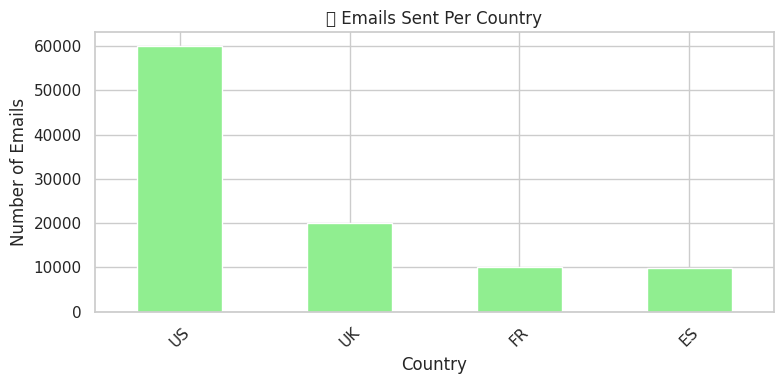

In [ ]:
plt.figure(figsize=(8, 4))
df['user_country'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("🌍 Emails Sent Per Country")
plt.xlabel("Country")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 📌 Total emails sent per country
emails_per_country = df['user_country'].value_counts()

# ✅ (FIXED) Total number of unique email_ids per country
unique_emails_per_country = df.groupby('user_country')['email_id'].nunique()

# 📈  emails sent per user in each country
print("📊  Emails Sent by Each Country:\n")
print(emails_per_country.round(2))
print("\n" + "="*60 + "\n")

# 📌 Total number of clicked emails per country
clicks_per_country = df[df['link_clicked'] == 1]['user_country'].value_counts()

# 📈 Click rate per country (clicked_emails / total_emails_sent) * 100
click_rate_per_country = (clicks_per_country / emails_per_country) * 100

# ✅ Fill missing countries (those with 0 clicks) with 0
click_rate_per_country = click_rate_per_country.fillna(0)

print("✅ Click Rate per Country (%):\n")
print(click_rate_per_country.sort_values(ascending=False).round(2))


📊  Emails Sent by Each Country:

user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64


✅ Click Rate per Country (%):

user_country
UK    2.47
US    2.44
ES    0.83
FR    0.80
Name: count, dtype: float64


### 🔹 **Plot 5: Email Opened vs Clicked**

### 📈 Description
> Bar chart comparing total number of opened emails vs clicked emails. Measures engagement quality. (graph for frequency emails send vs frequeny of emails opended and also clicked)


<ipython-input-19-01679d776197>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')
<ipython-input-19-01679d776197>:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


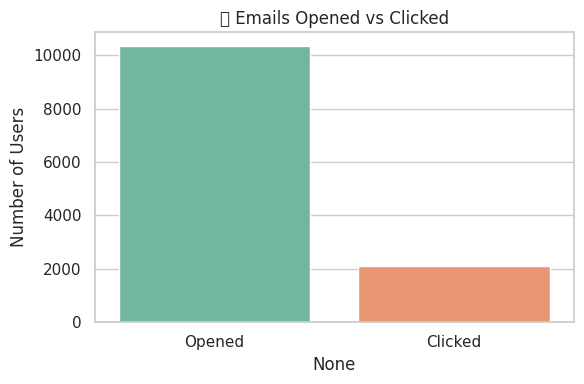

In [ ]:
counts = df[['email_opened', 'link_clicked']].sum()
counts.index = ['Opened', 'Clicked']

plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values, palette='Set2')
plt.title("📈 Emails Opened vs Clicked")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

### 🔹 **Plot 6: Past Purchases Histogram**

### 🛍️ Description
> Shows how many users made how many past purchases. Great for user segmentation and targeting.

<ipython-input-20-509c3caaa625>:6: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


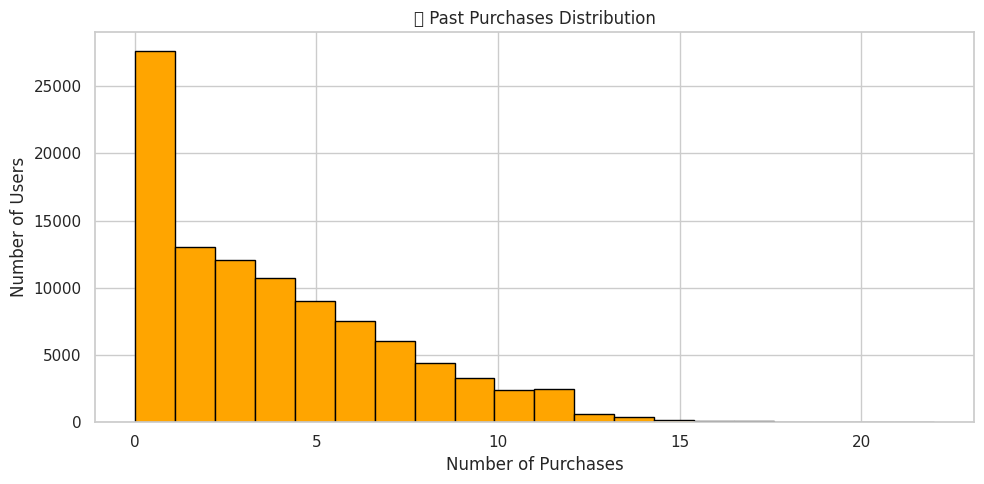

🧾 Average Past Purchases per User: 3.88


In [ ]:
plt.figure(figsize=(10, 5))
df['user_past_purchases'].hist(bins=20, color='orange', edgecolor='black')
plt.title("🛒 Past Purchases Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

print(f"🧾 Average Past Purchases per User: {df['user_past_purchases'].mean():.2f}")

### 🔹 **Plot 6: Open Rate by Country**

### 📊 Description
> Find out which countries had the highest email open rates. Can help tailor marketing strategies by region.

📬 Open Rate by Country:
 user_country
UK    12.016651
US    11.902028
FR     4.062031
ES     3.912913
Name: email_opened, dtype: float64


<ipython-input-21-4db25b4e8122>:8: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


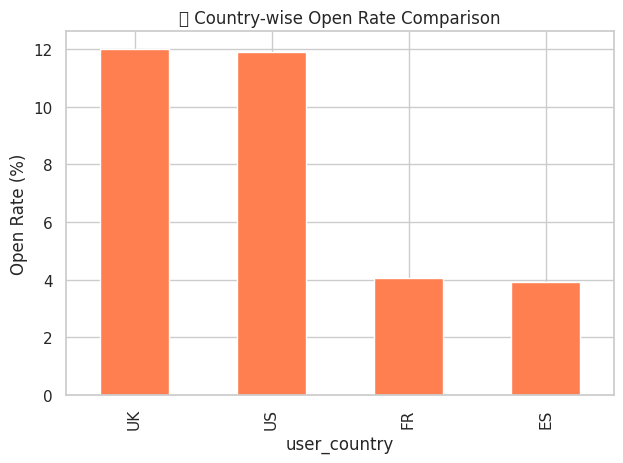

📉 STD Dev of Country-wise Open Rate: 4.603200428314177


In [ ]:
country_open_rate = df.groupby('user_country')['email_opened'].mean() * 100
print("📬 Open Rate by Country:\n", country_open_rate.sort_values(ascending=False))

# Visual
country_open_rate.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title("🌍 Country-wise Open Rate Comparison")
plt.ylabel("Open Rate (%)")
plt.tight_layout()
plt.show()

print("📉 STD Dev of Country-wise Open Rate:", country_open_rate.std())



In [ ]:
df.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'email_opened', 'link_clicked'],
      dtype='object')

### 🔹 **Plot 7: link_clicked Rate(CTR) by Country**

### 📊 Description
> Find out which countries had the highest email link_clicked rates. Can help tailor marketing strategies by region.

📬 Open Rate by Country:
 user_country
UK    2.467526
US    2.435981
ES    0.832748
FR    0.800400
Name: link_clicked, dtype: float64


<ipython-input-23-dff30c0d903a>:8: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


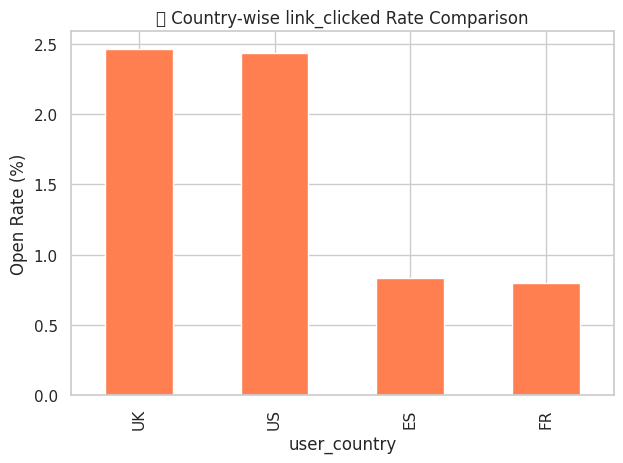

📉 STD Dev of Country-wise Open Rate: 0.9442513131237137


In [ ]:
country_open_rate = df.groupby('user_country')['link_clicked'].mean() * 100
print("📬 Open Rate by Country:\n", country_open_rate.sort_values(ascending=False))

# Visual
country_open_rate.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title("🌍 Country-wise link_clicked Rate Comparison")
plt.ylabel("Open Rate (%)")
plt.tight_layout()
plt.show()

print("📉 STD Dev of Country-wise Open Rate:", country_open_rate.std())



# 📈 Email Campaign Analysis using Conditional Probabilities

In this project, we investigate how different user and campaign features influence the probability of a user **clicking on a link** in an email. Our binary target variable is:

> `link_clicked` = 1 (if the user clicked)  
> `link_clicked` = 0 (if the user did not click)

We use **Conditional Probability** to quantify how likely a user is to click a link **given** a specific feature value.

---

## 📊 What is Conditional Probability?

Conditional Probability answers the question:

> **"What is the probability that a user clicks, given a particular feature value?"**

Mathematically, for a feature value \( X = x \):

$$
P(\text{Click} \mid X = x) = \frac{\text{Number of Clicks when } X = x}{\text{Total Users with } X = x}
$$


---

## 📅 Weekday-wise Link Click Probability

Let’s calculate the click probability for each day of the week.


$$
P(\text{Click}\mid \text{Weekday} = w) = \frac{\text{Clicks on day } w}{\text{Emails sent on day } w}
$$




| Weekday   | Click Probability |
|-----------|-------------------|
| **Wednesday** | **2.76%** ✅ |
| Tuesday   | 2.49%             |
| Thursday  | 2.44%             |
| Monday    | 2.29%             |
| Saturday  | 1.78%             |
| Sunday    | 1.67%             |
| **Friday**     | **1.40%** ❌ |

**✅ Best Day:** Wednesday  
**❌ Worst Day:** Friday  

🔍 **Insight:** Mid-week emails (especially on **Wednesdays**) tend to yield higher engagement.

---

## 🕒 Hour-wise Link Click Probability

Here, we analyze how engagement varies by hour.
$$
P(\text{Click} \mid \text{Hour} = h) = \frac{\text{Clicks at hour } h}{\text{Emails sent at hour } h}
$$

| Hour | Click Probability |
|------|-------------------|
| **23 (11 PM)** | **4.14%** ✅ |
| 24 (Midnight)  | 2.90%        |
| 10–12 (Morning)| ~2.6–2.8%    |
| **21 (9 PM)**  | **0.82%** ❌ |

**✅ Best Hour:** 11 PM  
**❌ Worst Hour:** 9 PM  

🔍 **Insight:** Users are most responsive **late at night**, especially around **11 PM**.

---

## 📧 Email Version Impact

We explore how different versions of the email affect user behavior.

$$
P(\text{Click} \mid \text{Email Version} = v) = \frac{\text{Clicks on version } v}{\text{Emails sent with version } v}
$$

| Email Version  | Click Probability |
|----------------|-------------------|
| **Personalized** | **2.73%** ✅ |
| Generic         | 1.51% ❌       |

**✅ Best Version:** Personalized  
**❌ Least Engaging:** Generic  

🔍 **Insight:** Personalization can nearly **double** the probability of a click.

---

## 🌍 Country-wise Engagement

We analyze click rates by user country:

$$
P(\text{Click} \mid \text{Country} = c) = \frac{\text{Clicks in country } c}{\text{Emails sent in country } c}
$$

| Country | Click Probability |
|---------|-------------------|
| **UK**  | **2.47%** ✅ |
| US      | 2.43%             |
| Spain (ES) | 0.83%          |
| **France (FR)** | **0.80%** ❌ |

**✅ Top Country:** UK  
**❌ Least Engaged:** France  

🔍 **Insight:** The **UK and US** audiences show stronger engagement.

---

## 🛒 Past Purchase History Impact

We categorize users into bins based on their number of past purchases and evaluate how likely they are to click.

Let \( p \) be the purchase range. Then,

$$
P(\text{Click} \mid \text{Past Purchases} = p) = \frac{\text{Clicks from users with } p \text{ purchases}}{\text{Total such users}}
$$

| Purchase Range | Click Probability |
|----------------|-------------------|
| **21–50**      | **60.0%** ✅ |
| 11–20          | 6.83%             |
| 6–10           | 3.64%             |
| 1–5            | 1.68%             |
| **0**          | **0.05%** ❌      |

**✅ Best Range:** 21–50 purchases  
**❌ Least Engaged:** 0 purchases  

🔍 **Insight:** Click probability increases significantly with **user purchase history**.

---

## ✅ Summary Table

| Feature         | Best Value         | Worst Value         |
|-----------------|--------------------|----------------------|
| **Weekday**         | Wednesday           | Friday               |
| **Hour**            | 11 PM (23)          | 9 PM (21)            |
| **Email Version**   | Personalized        | Generic              |
| **Country**         | UK                  | France               |
| **Purchase History**| 21–50 purchases     | 0 purchases          |

---

## 📌 Final Takeaways

🔎 We applied **conditional probability** to understand how individual features correlate with user clicks.  

📊 This simple yet powerful method provides **interpretable insights** for improving email campaign performance:

- Schedule campaigns during **high-performing time slots** (late nights, especially **11 PM**).
- Use **personalized content** for stronger engagement.
- Focus efforts on **engaged segments** (high purchase history, UK/US regions).

📈 This analysis empowers marketers to **prioritize resources strategically** for better ROI.

---



--- 📅 Link Click Probability by Weekday ---
weekday
Wednesday    0.027620
Tuesday      0.024889
Thursday     0.024445
Monday       0.022906
Saturday     0.017846
Sunday       0.016751
Friday       0.014037
Name: link_clicked, dtype: float64
Most Clicked Day: Wednesday | Least Clicked Day: Friday


<ipython-input-27-0559380f1a7c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_prob.index, y=weekday_prob.values, palette='viridis')


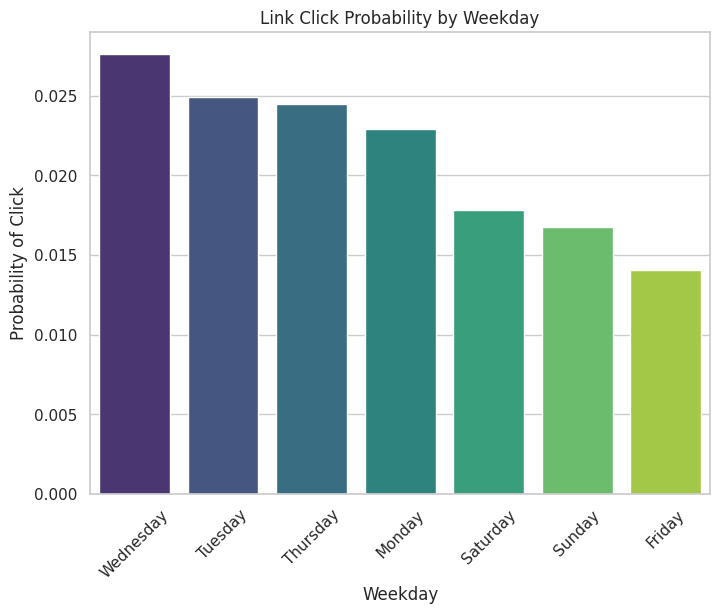

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to lowercase if needed (e.g., email_version, user_country)
df['email_version'] = df['email_version'].str.lower()
df['user_country'] = df['user_country'].str.title()

# Function to calculate conditional probabilities
def conditional_prob_by_feature(df, feature):
    prob = df.groupby(feature)['link_clicked'].mean().sort_values(ascending=False)
    return prob

# 1. Weekday
print("\n--- 📅 Link Click Probability by Weekday ---")
weekday_prob = conditional_prob_by_feature(df, 'weekday')
print(weekday_prob)
print("Most Clicked Day:", weekday_prob.idxmax(), "| Least Clicked Day:", weekday_prob.idxmin())
# Plot Weekday Click Probability
plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_prob.index, y=weekday_prob.values, palette='viridis')
plt.title('Link Click Probability by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Probability of Click')
plt.xticks(rotation=45)
plt.show()


--- 🕒 Link Click Probability by Hour ---
hour
23    0.041379
24    0.028986
10    0.028240
11    0.027128
9     0.025794
12    0.025661
15    0.024907
16    0.023197
14    0.020742
13    0.019889
22    0.019608
3     0.019523
8     0.018933
17    0.018489
7     0.018284
1     0.018128
5     0.018013
6     0.017147
19    0.016575
2     0.016322
4     0.016186
18    0.016186
20    0.012195
21    0.008219
Name: link_clicked, dtype: float64
Best Hour: 23 | Worst Hour: 21


<ipython-input-28-52272abff340>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_prob.index, y=hour_prob.values, palette='coolwarm')


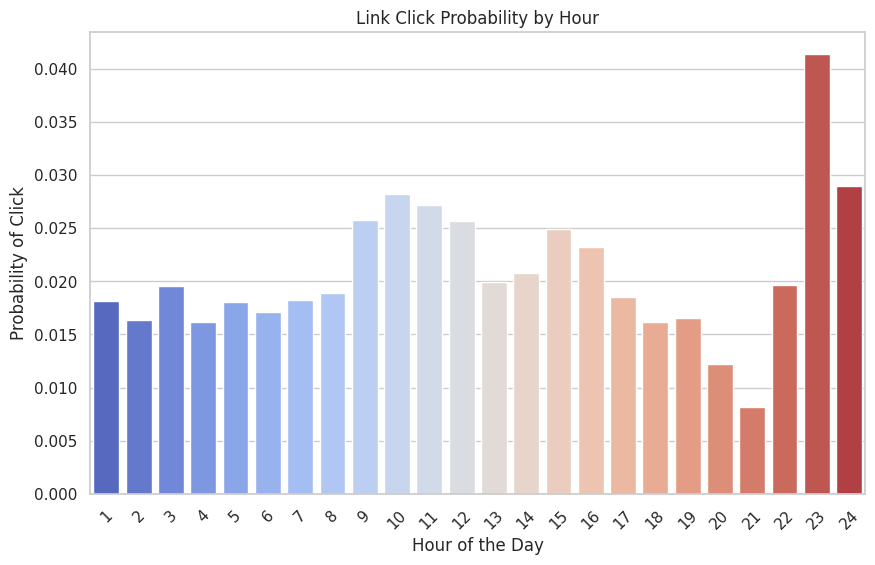

In [28]:
# 2. Hour
print("\n--- 🕒 Link Click Probability by Hour ---")
hour_prob = conditional_prob_by_feature(df, 'hour')
print(hour_prob)
print("Best Hour:", hour_prob.idxmax(), "| Worst Hour:", hour_prob.idxmin())

# Plot Hour Click Probability
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_prob.index, y=hour_prob.values, palette='coolwarm')
plt.title('Link Click Probability by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Probability of Click')
plt.xticks(rotation=45)
plt.show()




--- 📧 Link Click Probability by Email Version ---
email_version
personalized    0.027294
generic         0.015137
Name: link_clicked, dtype: float64
More Clicked Version: personalized | Less Clicked Version: generic


<ipython-input-29-cf5ea51ee6fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=version_prob.index, y=version_prob.values, palette='Set2')


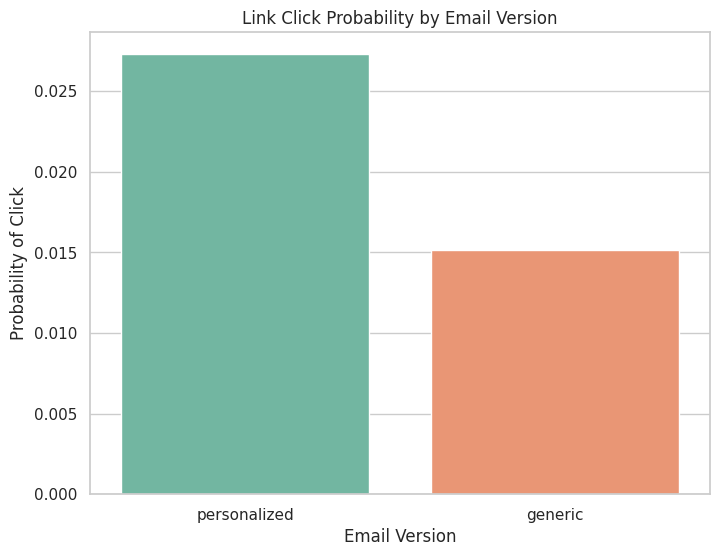

In [29]:
# 3. Email Version
print("\n--- 📧 Link Click Probability by Email Version ---")
version_prob = conditional_prob_by_feature(df, 'email_version')
print(version_prob)
print("More Clicked Version:", version_prob.idxmax(), "| Less Clicked Version:", version_prob.idxmin())

# Plot Email Version Click Probability
plt.figure(figsize=(8, 6))
sns.barplot(x=version_prob.index, y=version_prob.values, palette='Set2')
plt.title('Link Click Probability by Email Version')
plt.xlabel('Email Version')
plt.ylabel('Probability of Click')
plt.show()




--- 🌍 Link Click Probability by Country ---
user_country
Uk    0.024675
Us    0.024360
Es    0.008327
Fr    0.008004
Name: link_clicked, dtype: float64
Most Clicked Country: Uk | Least Clicked Country: Fr


<ipython-input-31-be5281c7c057>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_prob.index, y=country_prob.values, palette='Blues')


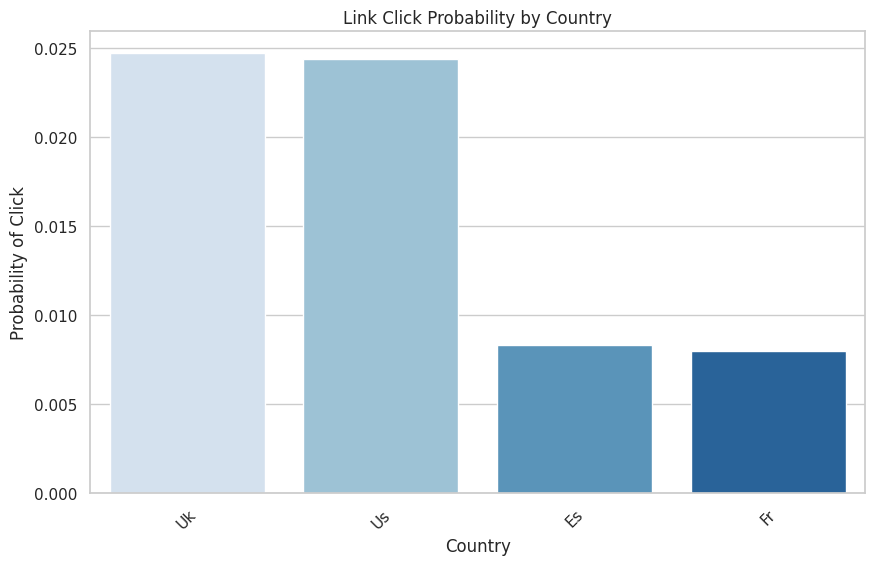

In [31]:
# 4. Country
print("\n--- 🌍 Link Click Probability by Country ---")
country_prob = conditional_prob_by_feature(df, 'user_country')
print(country_prob.head(10))  # Top 10 countries
print("Most Clicked Country:", country_prob.idxmax(), "| Least Clicked Country:", country_prob.idxmin())

# Plot Country Click Probability
plt.figure(figsize=(10, 6))
sns.barplot(x=country_prob.index, y=country_prob.values, palette='Blues')
plt.title('Link Click Probability by Country')
plt.xlabel('Country')
plt.ylabel('Probability of Click')
plt.xticks(rotation=45)
plt.show()




--- 🛒 Link Click Probability by Purchase Threshold ---
purchase_bin
21-50     0.600000
11-20     0.068347
6-10      0.036451
1-5       0.016795
0         0.000504
51-100         NaN
100+           NaN
Name: link_clicked, dtype: float64
Best Purchase Range: 21-50 | Least Clicked Purchase Range: 0


<ipython-input-27-0559380f1a7c>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = df.groupby(feature)['link_clicked'].mean().sort_values(ascending=False)
<ipython-input-39-755c01222556>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_prob.index, y=purchase_prob.values, palette='magma')


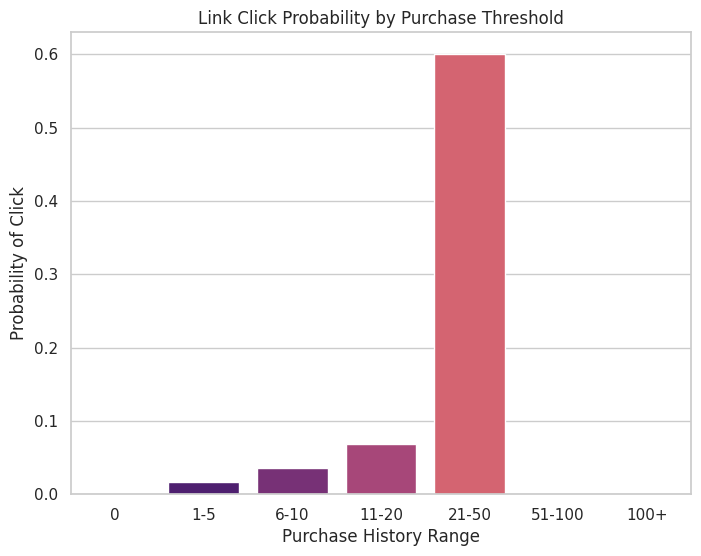

In [39]:
# Get max value from user_past_purchases
max_purchase = df['user_past_purchases'].max()

# Ensure max_purchase is larger than 100 to keep bins increasing
if max_purchase <= 100:
    max_purchase = 101  # just push it over 100 to avoid error

# Now define bins
bins = [-1, 0, 5, 10, 20, 50, 100, max_purchase]
labels = ["0", "1-5", "6-10", "11-20", "21-50", "51-100", "100+"]

# Create binned feature
df['purchase_bin'] = pd.cut(df['user_past_purchases'], bins=bins, labels=labels)

# Calculate conditional probability
purchase_prob = conditional_prob_by_feature(df, 'purchase_bin')

# Print results
print("\n--- 🛒 Link Click Probability by Purchase Threshold ---")
print(purchase_prob)
print("Best Purchase Range:", purchase_prob.idxmax(), "| Least Clicked Purchase Range:", purchase_prob.idxmin())

# Plot Purchase Threshold Click Probability
plt.figure(figsize=(8, 6))
sns.barplot(x=purchase_prob.index, y=purchase_prob.values, palette='magma')
plt.title('Link Click Probability by Purchase Threshold')
plt.xlabel('Purchase History Range')
plt.ylabel('Probability of Click')
plt.show()


# 📧 Email Marketing Campaign Analysis & Open Rate Optimization

Welcome! This notebook analyzes user behavior patterns from an email marketing campaign dataset to uncover **what factors most influence email open rates**. Using Python and visualization libraries, we extract key insights that can help marketers **optimize when and to whom emails are sent**.

---

## 📌 Objectives

- Understand user behavior based on past purchases, email timings, and engagement
- Identify optimal **days**, **times**, and **user segments** for higher open rates
- Visualize patterns using clean and insightful plots

---

## 🛠️ Tools & Libraries

- **Pandas** for data manipulation
- **Seaborn & Matplotlib** for visualization
- **Python** for analysis and logic

---

## 📊 Key Insights

### 1. 🛍️ Purchase History Impact
- Users with **20–49 past purchases** had the **highest open rate**: **~44%**
- Engagement increases consistently with prior purchase activity

### 2. 📅 Best Weekdays to Send Emails
| Day        | Open Probability |
|------------|------------------|
| Tuesday    | 12.0%            |
| Wednesday  | 12.0%            |
| Thursday   | 11.8%            |

> ✅ **Tuesday & Wednesday** are the most effective days to send emails

### 3. 🕒 Best Times to Send Emails
| Hour (24h) | Open Probability |
|------------|------------------|
| 24 (Midnight) | 15.9%         |
| 10 AM       | 13.2%           |
| 11 AM       | 12.7%           |

> ✅ **Late night** and **mid-morning (10–11 AM)** are most effective times

---

## 📈 Visualizations

- **KDE Plot** to compare purchase distribution between opened & unopened emails
- **Bar Charts** for:
  - Email open rate by weekday
  - Email open rate by hour of day
  - Email open rate by purchase history bin

---

## 📍 Business Recommendations

1. 🎯 **Target high-purchase users** (20+ past purchases) for maximum engagement.
2. 📆 **Schedule emails on Tuesdays or Wednesdays** for higher visibility.
3. ⏰ **Send emails at 10–11 AM or around midnight** for best open rates.


# Decision tree based model

##  📊 **Analysis of Email Open Probability by Feature Value**

### **Objective**
The goal of this analysis is to explore the factors that influence whether an email gets opened. By examining various features like the content of the email, time of sending, user behavior, and more, we aim to identify key insights to improve email open rates. This can help marketers and email campaign managers optimize their strategies to achieve higher engagement.

### **Features Analyzed**
We analyze the following features to understand their effect on the email open probability:

- **Email Text**: Whether the email is short or long.
- **Email Version**: Whether the email is personalized or generic.
- **Hour**: The time of day when the email was sent.
- **Weekday**: The day of the week when the email was sent.
- **User Country**: The country in which the email recipient is located.
- **User Past Purchases**: The number of past purchases made by the user.


### **Key Insights from the Analysis**
The decision tree model gives us a clear understanding of which feature values are more likely to result in an email being opened. Here are the findings based on different features by usng information gain and also the entropy:

#### 📌 **Email Text**  
- **Short Emails** have a higher probability of being opened (0.1159) compared to **Long Emails** (0.0912).
  
#### 📌 **Email Version**
- **Personalized Emails** have a significantly higher probability of being opened (0.1278) compared to **Generic Emails** (0.0793).

#### 📌 **Hour of Day**
- Emails sent at certain hours have better open rates. For example:
  - **Hour 24** has the highest probability of being opened (0.1594).
  - **Hour 10** and **Hour 11** follow closely with high open rates (0.1324 and 0.1266 respectively).

#### 📌 **Weekday**
- **Tuesday** and **Wednesday** have the highest open probabilities (0.1205 and 0.1203), while **Friday** and **Sunday** show the lowest (0.0741 and 0.0876 respectively).

#### 📌 **User Country**
- Users in **the UK** (0.1202) and **the US** (0.1190) have higher probabilities of opening emails compared to users in **France** (0.0406) and **Spain** (0.0391).

#### 📌 **User Past Purchases**
- Users with more past purchases are more likely to open emails. For example, users with **22 past purchases** have a 100% probability of opening the email, while users with **0 past purchases** have only a 3.83% probability.

### **Next Steps**
Based on the insights from the analysis:
- **Personalized Emails** should be prioritized to increase the likelihood of engagement.
- Focus on sending emails during optimal hours (e.g., Hour 24, 10, and 11).
- Consider targeting specific weekdays (Tuesday and Wednesday) when open rates are higher.
- Tailor email campaigns to users with a higher number of past purchases.

### **Conclusion**
This notebook demonstrates the power of decision trees in identifying the key factors that drive email open rates. By understanding these patterns, you can refine your email marketing strategy to boost engagement and improve campaign success.


In [56]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Ensure df is loaded with the correct data
# Example features
features = ['email_text', 'email_version', 'hour', 'weekday',
            'user_country', 'user_past_purchases']
target_open = 'email_opened'
target_click = 'link_clicked'

# Label encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in features:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Define X
X = df_encoded[features]

### 📬 OPEN MODEL
y_open = df_encoded[target_open]
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y_open, test_size=0.2, random_state=42)
tree_open = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree_open.fit(X_train_o, y_train_o)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

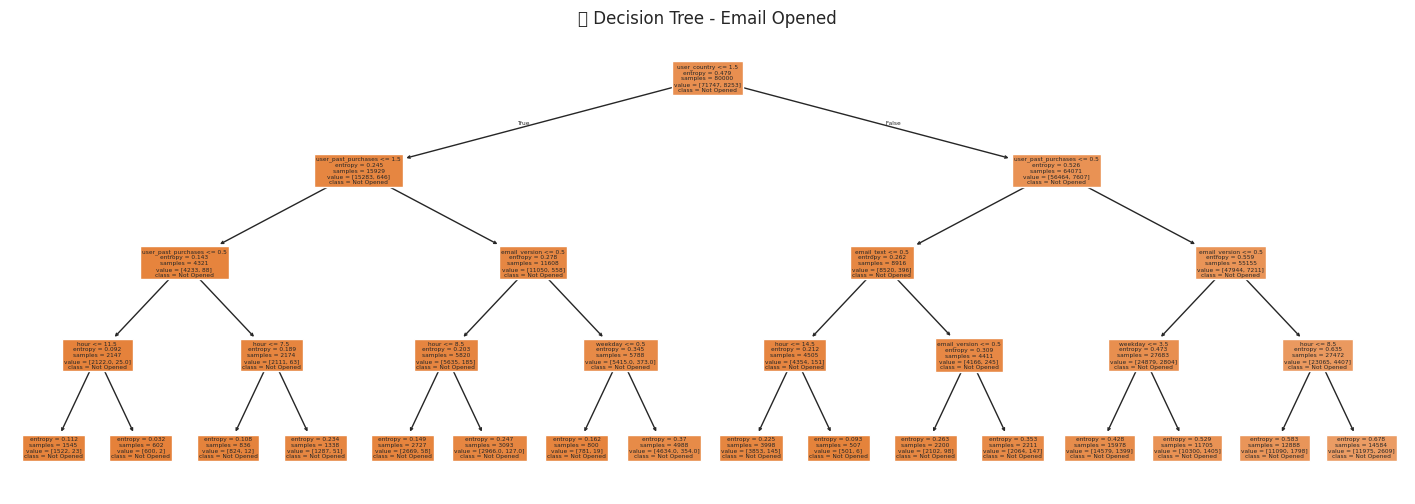

In [58]:
### 🌳 Tree Plotting
plt.figure(figsize=(18, 6))
plot_tree(tree_open, feature_names=features, class_names=['Not Opened', 'Opened'], filled=True)
plt.title("📬 Decision Tree - Email Opened")
plt.show()

In [71]:
import pandas as pd

# Assuming you have already loaded your DataFrame (df_encoded) and label_encoders
# Sample DataFrame and label_encoders are placeholders; replace them with your actual data

# Function to calculate and print feature value effects on email open rate
def feature_value_effects(df, feature, target, label_map=None):
    """
    Calculate the probability of the target variable being '1' (opened) for each feature value.
    Prints detailed analysis for each feature value, including threshold-based insights.
    """
    print(f"\n💡 Feature: {feature}")

    if label_map:
        print(f"Feature '{feature}' Value Mapping: {label_map}")

    # Grouping by feature values and calculating the mean of 'email_opened'
    feature_values_prob = df.groupby(feature)[target].mean()

    # Sorting the probabilities in descending order
    sorted_probabilities = feature_values_prob.sort_values(ascending=False)

    # Print the detailed values
    for value, prob in sorted_probabilities.items():
        if label_map:
            value = label_map.get(value, value)
        print(f"\t\t\t Value: {value} | Probability of Clicking: {prob:.4f}")

    return sorted_probabilities

# Print the email open probability by feature value
print("\n=== 💡 Email Open Probability by Feature Value ===")

# Assuming 'features' is your list of feature columns
for feat in features:
    label_map = None
    if feat in label_encoders:
        # Inverse transform feature values for categorical columns
        label_map = {i: label_encoders[feat].inverse_transform([i])[0] for i in df_encoded[feat].unique()}

    print(f"\n📌 {feat.upper()} on OPEN:")
    feature_value_effects(df_encoded, feat, 'email_opened', label_map)



=== 💡 Email Open Probability by Feature Value ===

📌 EMAIL_TEXT on OPEN:

💡 Feature: email_text
Feature 'email_text' Value Mapping: {np.int64(1): 'short_email', np.int64(0): 'long_email'}
			 Value: short_email | Probability of Clicking: 0.1159
			 Value: long_email | Probability of Clicking: 0.0912

📌 EMAIL_VERSION on OPEN:

💡 Feature: email_version
Feature 'email_version' Value Mapping: {np.int64(1): 'personalized', np.int64(0): 'generic'}
			 Value: personalized | Probability of Clicking: 0.1278
			 Value: generic | Probability of Clicking: 0.0793

📌 HOUR on OPEN:

💡 Feature: hour
			 Value: 24 | Probability of Clicking: 0.1594
			 Value: 10 | Probability of Clicking: 0.1324
			 Value: 11 | Probability of Clicking: 0.1266
			 Value: 9 | Probability of Clicking: 0.1257
			 Value: 12 | Probability of Clicking: 0.1245
			 Value: 14 | Probability of Clicking: 0.1094
			 Value: 17 | Probability of Clicking: 0.1094
			 Value: 13 | Probability of Clicking: 0.1091
			 Value: 15 | Probabili

## 📊 **Analysis of Email Click Probability by Feature Value**

### **Objective**
The goal of this analysis is to identify which features influence the likelihood of a user clicking on a link within an email. By analyzing the impact of different features (such as email text, sending time, and user history), we aim to understand how to optimize email campaigns and improve the click-through rate (CTR).

### **What We Did**
In this analysis, we explored the relationship between various features and the likelihood of email link clicks. To achieve this, we used a **decision tree model** that helps break down the impact of each feature. Here's how the features were analyzed using entropy and also information gain in our data

### **Key Insights from the Analysis**

Here’s a summary of the insights we discovered based on the different features:

#### 📌 **Email Text**
- **Short Emails**: Users are more likely to click on links in short emails (probability: 0.0239) compared to longer emails (probability: 0.0185). This suggests that brevity might lead to higher engagement.

#### 📌 **Email Version**
- **Personalized Emails**: Emails that are personalized (probability: 0.0273) have a higher click-through rate compared to generic emails (probability: 0.0151). Personalization increases engagement by making emails more relevant to recipients.

#### 📌 **Hour of Day**
- The time when emails are sent significantly impacts click rates:
  - **Hour 23**: Emails sent at this time had the highest click probability (0.0414).
  - **Hour 24** and **Hour 10** also had strong click rates (0.0290 and 0.0282 respectively).
  - On the other hand, times like **Hour 21** and **Hour 20** saw the lowest click rates (0.0082 and 0.0122 respectively).

#### 📌 **Weekday**
- Emails sent on certain weekdays are more likely to result in clicks:
  - **Wednesday** had the highest probability of clicks (0.0276).
  - **Tuesday** and **Thursday** followed closely with high click probabilities (0.0249 and 0.0244 respectively).
  - **Friday** and **Sunday** had the lowest click rates, highlighting that these days might not be optimal for sending emails aimed at maximizing clicks.

#### 📌 **User Country**
- Users in **the UK** and **the US** had higher click-through rates (0.0247 and 0.0244, respectively) compared to users in **Spain** and **France** (0.0083 and 0.0080). This suggests regional variations in user engagement, which could influence where you target your email campaigns.

#### 📌 **User Past Purchases**
- Users with a higher number of **past purchases** are more likely to click on links in emails:
  - **Users with 22 past purchases** had a 100% probability of clicking.
  - **Users with 21 past purchases** had a 50% chance of clicking.
  - Conversely, **users with 0 past purchases** had a very low probability (0.0005), indicating that prior purchasing behavior strongly influences email engagement.

### **Recommendations Based on Findings**

1. **Optimize Email Length**: Aim for shorter emails to increase the likelihood of click-throughs. Short emails are more engaging and easier to consume, potentially boosting the CTR.
   
2. **Personalize Emails**: Personalization significantly increases the chances of users clicking on links. Consider including the recipient’s name, purchase history, or other relevant details to increase engagement.

3. **Optimal Sending Times**:
   - Focus on sending emails at **Hour 23** (late night) or **Hour 10** (morning) for maximum click engagement.
   - Avoid sending emails during less optimal times (e.g., **Hour 20** or **Hour 21**), as they are associated with lower click-through rates.

4. **Choose the Right Weekdays**: Send emails on **Wednesday**, **Tuesday**, and **Thursday** to maximize click rates. These days have higher engagement compared to the weekend or Fridays.

5. **Target Specific Countries**: Prioritize users from countries like **the UK** and **the US**, where click rates are higher. You can also adjust the email content to suit the preferences of users in different regions.

6. **Engage Past Purchasers**: Users with a higher number of past purchases are more likely to click on email links. Consider segmenting your audience based on their purchase history and targeting users with a higher number of past purchases for future campaigns.

### **Conclusion**
The analysis of email click probabilities based on various features reveals significant patterns that can help improve email marketing strategies. By tailoring emails based on text length, personalization, optimal send times, weekdays, user location, and past purchases, marketers can increase their email click-through rates and boost engagement.

This decision tree analysis provides clear and actionable insights that can be directly applied to enhance email campaigns and drive better results in terms of user interaction with email content.


In [57]:

### 🔗 CLICK MODEL
y_click = df_encoded[target_click]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_click, test_size=0.2, random_state=42)
tree_click = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree_click.fit(X_train_c, y_train_c)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

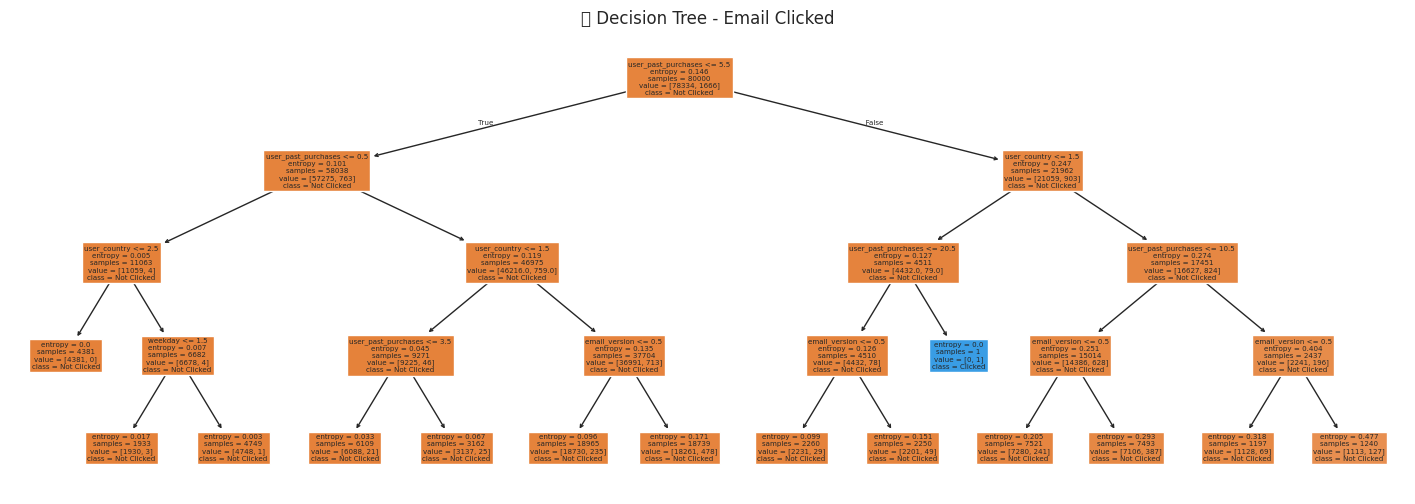

In [60]:
plt.figure(figsize=(18, 6))
plot_tree(tree_click, feature_names=features, class_names=['Not Clicked', 'Clicked'], filled=True)
plt.title("🔗 Decision Tree - Email Clicked")
plt.show()

In [70]:
def feature_value_effects(df, feature, target, label_map=None):
    """
    Calculate the probability of the target variable being '1' (clicked) for each feature value.
    Prints detailed analysis for each feature value, including threshold-based insights.
    """
    print(f"\n💡 Feature: {feature}")

    if label_map:
        print(f"Feature '{feature}' Value Mapping: {label_map}")

    # Grouping by feature values and calculating the mean of 'link_clicked'
    feature_values_prob = df.groupby(feature)[target].mean()

    # Sorting the probabilities in descending order
    sorted_probabilities = feature_values_prob.sort_values(ascending=False)

    # Print the detailed values
    for value, prob in sorted_probabilities.items():
        if label_map:
            value = label_map.get(value, value)
        print(f"\t\t\t Value: {value} | Probability of Clicking: {prob:.4f}")

    return sorted_probabilities

# Print the email click probability by feature value
print("\n=== 💡 Email Click Probability by Feature Value ===")

# Assuming 'features' is your list of feature columns
for feat in features:
    label_map = None
    if feat in label_encoders:
        # Inverse transform feature values for categorical columns
        label_map = {i: label_encoders[feat].inverse_transform([i])[0] for i in df_encoded[feat].unique()}

    print(f"\n📌 {feat.upper()} on CLICK:")
    feature_value_effects(df_encoded, feat, 'link_clicked', label_map)



=== 💡 Email Click Probability by Feature Value ===

📌 EMAIL_TEXT on CLICK:

💡 Feature: email_text
Feature 'email_text' Value Mapping: {np.int64(1): 'short_email', np.int64(0): 'long_email'}
			 Value: short_email | Probability of Clicking: 0.0239
			 Value: long_email | Probability of Clicking: 0.0185

📌 EMAIL_VERSION on CLICK:

💡 Feature: email_version
Feature 'email_version' Value Mapping: {np.int64(1): 'personalized', np.int64(0): 'generic'}
			 Value: personalized | Probability of Clicking: 0.0273
			 Value: generic | Probability of Clicking: 0.0151

📌 HOUR on CLICK:

💡 Feature: hour
			 Value: 23 | Probability of Clicking: 0.0414
			 Value: 24 | Probability of Clicking: 0.0290
			 Value: 10 | Probability of Clicking: 0.0282
			 Value: 11 | Probability of Clicking: 0.0271
			 Value: 9 | Probability of Clicking: 0.0258
			 Value: 12 | Probability of Clicking: 0.0257
			 Value: 15 | Probability of Clicking: 0.0249
			 Value: 16 | Probability of Clicking: 0.0232
			 Value: 14 | Proba

# 🧠 Conclusion

In this project, we leveraged **conditional probability** and **decision tree analysis** to uncover what drives **email opens and clicks**.

### 🔍 Key Findings:

- **Personalized emails**, sent around **11 PM** or **mid-morning (10–11 AM)** on **Tuesdays and Wednesdays**, yield the **highest engagement**.
- Users with **higher past purchases (especially 20+)** are **significantly more responsive**.
- **Shorter email formats** tend to **outperform longer ones**.
- **Geographic patterns** emerged:
  - **UK and US audiences** are **most receptive**.
  - **France and Spain** showed **lower engagement**.

These insights offer **clear strategies to maximize open rates and click-through rates (CTR)** for future campaigns, making marketing efforts **data-driven and ROI-focused**.
